# Text Image Segmentation for Optimal Optical character recognition

Optical character recognition (OCR) aims to recognize texts in imaged documents. It is probably one of the earliest computer vision techniques that have been commercialized successfully. OCR usually involves a series of image processing and recognition tasks including 1) text image binarization that converts a colour/grayscale image into a binary image with multiple foreground regions (usually characters); 2) connected component labelling that detects each binarized character region; 3) character recognition by using some classifiers such as a pre-trained neural network.

In this project, you need to explore and develop various image binarization algorithms targeting the optimal character recognition accuracy. You do not need to develop OCR algorithm but use an open-source OCR software Tesseract: https://github.com/tesseract-ocr/tesseract. You can google the keyword "Tesseract" to search for more information about how to use this software. In addition, you just need to work on either one (or both) of the two sample text images that can be downloaded from the project website in NTULearn.

In [1]:
# import the relevant libraries
from matplotlib import pyplot as plt

import cv2
import numpy as np
import pytesseract
import scipy.ndimage

import otsu  # own library

In [33]:
# define utility functions
def show_image(image: np.ndarray):
    '''
    Display the image within this notebook
    '''
    plt.figure(figsize=(19.2, 14.4))
    plt.imshow(image, cmap='gray')
    plt.show()


def show_image_histogram(image: np.ndarray):
    '''
    Display the histogram of gray-levels for the image, in this notebook
    '''
    plt.hist(
        x=image.ravel(),
        bins=256,
        range=[0, 256],
    )
    plt.show()

In [35]:
# load the first image
image1 = cv2.imread('images/sample01.png', cv2.IMREAD_GRAYSCALE)

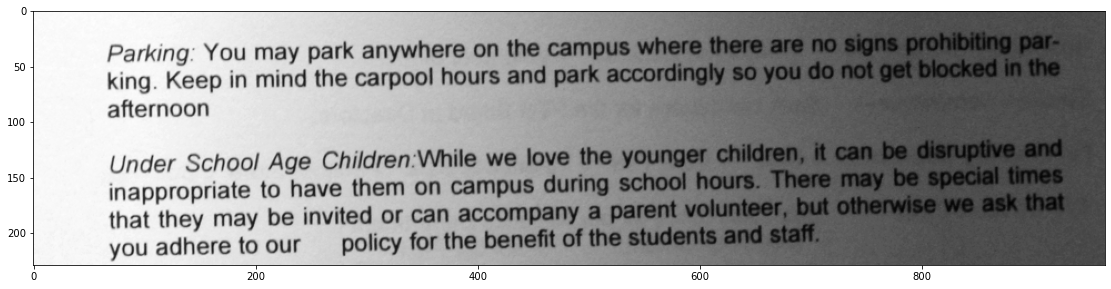

In [36]:
# view the first image
show_image(image1)

In [37]:
# try using Tesseract on an image as is
text = pytesseract.image_to_string(image1)
print(text)

Parking: You may park anywhere on the ce
king. Keep in mind the carpool hours and park
afternoon

Under School Age Children:While we love
inappropriate to have them on campus @ )
that they may be invited or can accompany :
you adhere to our _ policy for the benefit of

 



In [38]:
# load the second image
image2 = cv2.imread('images/sample02.png', cv2.IMREAD_GRAYSCALE)

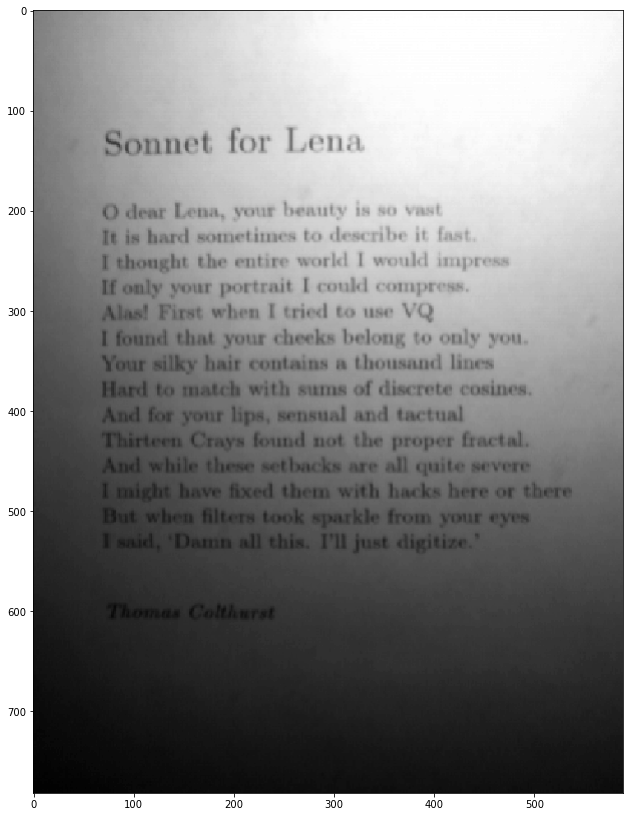

In [39]:
# view the second image
show_image(image2)

In [41]:
# try using Tesseract on an image as is
text = pytesseract.image_to_string(image2)
print(text)

Sonnet for Lena

 



This project consists of the following tasks:

1) Implement the Ostu global thresholding algorithm for binarizing the sample text images and feed the binairzed images to the OCR software to evaluate the OCR accuracy. Discuss any problems with the Otsu global thresholding algorithm.

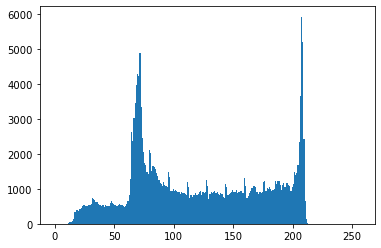

In [42]:
# confirm histogram for the first image is bimodal
show_image_histogram(image1)

In [48]:
# run Otsu's algorithm on the image to get the threshold
threshold_mask = otsu.threshold(image1)

# binarize the image
binarized_image = np.where(image1 > threshold_mask, 255, 0)
binarized_image = binarized_image.astype(np.uint8)  # right type for Tesseract

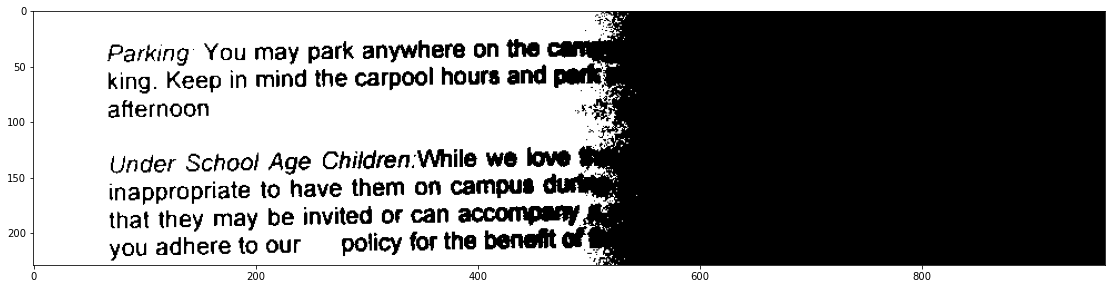

In [49]:
# view the binarized image
show_image(binarized_image)

In [8]:
# try using Tesseract on the binarized image
# should get left-half of text, like before
text = pytesseract.image_to_string(binarized_image)
print(text)

Parking You may park anywhere on the cf
king. Keep in mind the carpool hours and peri,
afternoon

Under School Age Children:While we love
inappropriate to have them on campus @ i
that they may be invited or can accompany J
you adhere to our —_policy for the benefit of

 



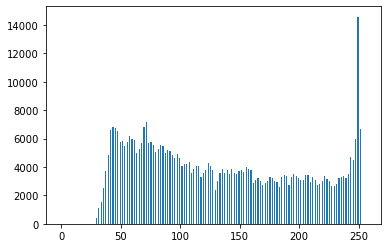

In [45]:
# confirm histogram for the second image is bimodal
show_image_histogram(image2)

In [50]:
# run Otsu's algorithm on the image to get the threshold
threshold_mask = otsu.threshold(image2)

# binarize the image
binarized_image = np.where(image2 > threshold_mask, 255, 0)
binarized_image = binarized_image.astype(np.uint8)  # right type for Tesseract

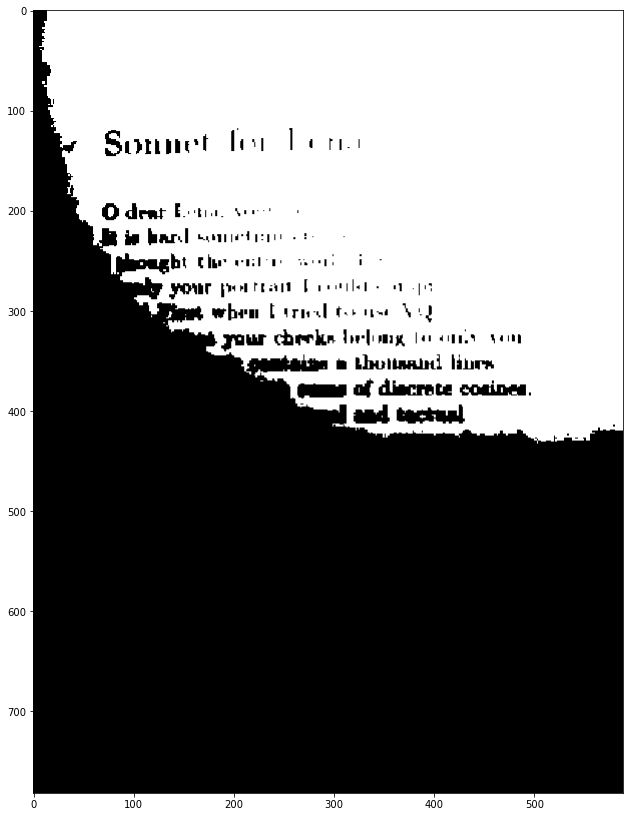

In [51]:
# view the binarized image
show_image(binarized_image)

In [52]:
# try using Tesseract on the binarized image
# I can only make out 'Sonnet'
text = pytesseract.image_to_string(binarized_image)
print(text)

Sonnet for ler

 



2) Design your own algorithms to address the problem of Otsu global thresholding algorithm, and evaluate OCR accuracy for the binary images as produced by your algorithms. You may explore different approaches such as adaptive thresholding, image enhancement, etc., and the target is to achieve the best OCR accuracy.

*try splitting the image into segments, then perform Otsu's algorithm on each segment*

*Note: segments should be of the right size*

In [55]:
# first image
threshold_mask = otsu.segmented_threshold(
    image=image1,
    num_vertical_segments=2,
    num_horizontal_segments=8,
)

# binarize the image
binarized_image = np.where(image1 > threshold_mask, 255, 0)
binarized_image = binarized_image.astype(np.uint8)  # right type for Tesseract

In [56]:
# check segment size
image_height, image_length = image.shape

# take ceiling to ensure entire image is covered
segment_height = image_height // 2 + 1
segment_length = image_length // 8 + 1

print(segment_height)
print(segment_length)

115
121


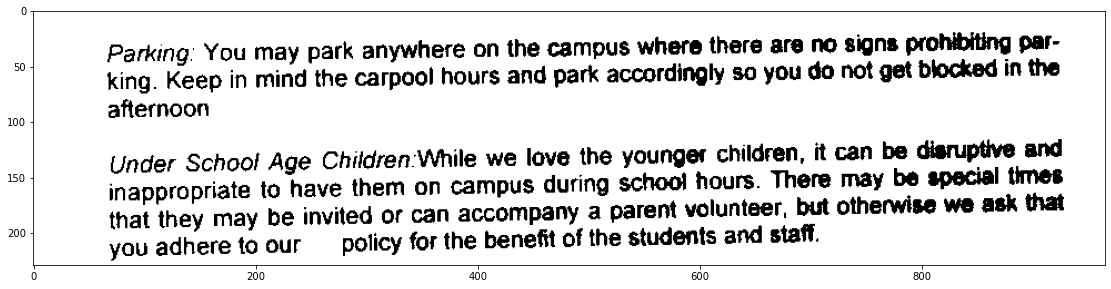

In [57]:
# view the binarized image
show_image(binarized_image)

In [58]:
# try using Tesseract on the binarized image
# should get the full text
text = pytesseract.image_to_string(binarized_image)
print(text)

Parking: You may park anywhere on the campus where there are no signs prohibiting par-
king. Keep in mind the carpool hours and park accordingly so you do not get blocked in the
afternoon

Under School Age Children:While we love the younger children, it can be disruptive and
inappropriate to have them on campus during school hours. There may be special times
that they may be invited or can accompany a parent volunteer, but otherwise we ask that
you adhere to our —_ policy for the benefit of the students and staff.



In [72]:
# second image
threshold_mask = otsu.segmented_threshold(
    image=image2,
    num_vertical_segments=40,
    num_horizontal_segments=30,
)

# binarize the image
binarized_image = np.where(image2 > threshold_mask, 255, 0)
binarized_image = binarized_image.astype(np.uint8)  # right type for Tesseract

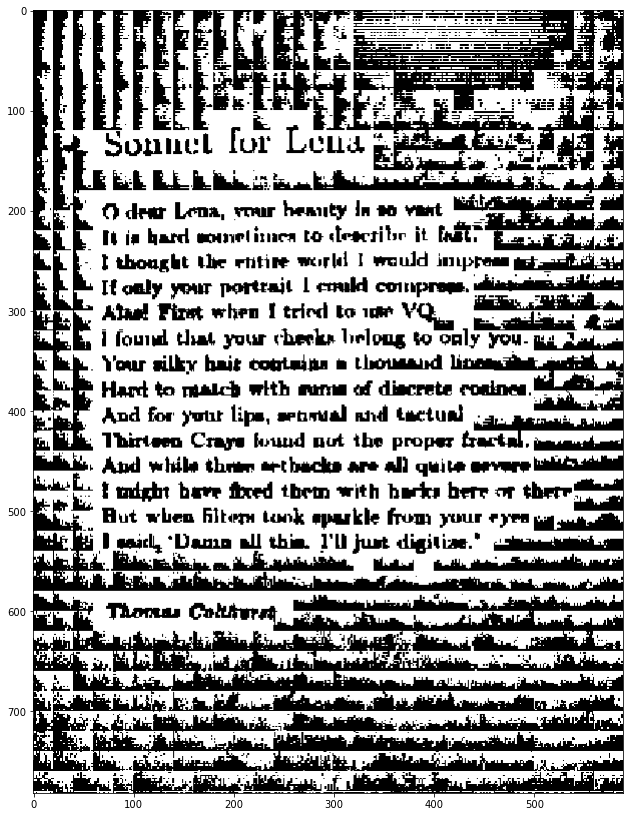

In [73]:
# view the binarized image
show_image(binarized_image)

In [74]:
# try using Tesseract on the binarized image
# hopefully it is better
text = pytesseract.image_to_string(binarized_image)
print(text)

’ Oy dear Lena, your beauty Inn vent

* Tt ia hard woonetimes to clescribe it fet

- Pebought Uke entire world 1 would impromen nate
shite Sill

Tf aaly your portesjt | could compress. «
Ale! First when f tried to wae V4

1 found that your cheeks belong to only ‘you. tae

Your silky bait copteina @ thotsand
Hard to match with wurde of discrete coaines.

And for ysur lips, seoal and tectual
f Thirteen Crays found not the proper api

- And while throm acthacks are all clue pevers uate
eek C. might have fhved them with hacks bere or there ess
3. Hut when Bltem took sparkle from your Ne
i saicl, ‘Damo all thie. I'll fnggiN ioe.” mide aia

 

 

 

   



*Try sliding a window over the image, and perform Otsu's algorithm within window, then let each pixel's threshold be the average of values obtained from window.*

*Can be thought of as the dynamic version of the segmented thresholding version.*

*Also known as adaptive mean thresholding.*

*Note: window should be of the right size*

In [75]:
# first image
threshold_mask = otsu.sliding_window_threshold(
    image=image1,
    window_height=128,
    window_length=128,
    vertical_stride=16,
    horizontal_stride=16,
)

# binarize the image
binarized_image = np.where(image1 > threshold_mask, 255, 0)
binarized_image = binarized_image.astype(np.uint8)  # right type for Tesseract

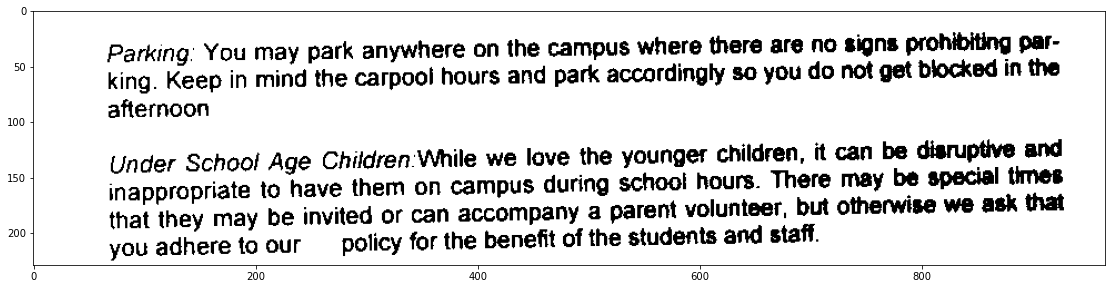

In [76]:
# view the binarized image
show_image(binarized_image)

In [77]:
# try using Tesseract on the binarized image
# should get the full text
text = pytesseract.image_to_string(binarized_image)
print(text)

Parking: You may park anywhere on the campus where there are no signs prohibiting par-
king. Keep in mind the carpool hours and park accordingly 80 you do not get blocked in the
afternoon

Under School Age Children:While we love the younger children, it can be disruptive and
inappropriate to have them on campus during school hours. There may be special times
that they may be invited or can accompany a parent volunteer, but otherwise we ask that
you adhere to our —_ policy for the benefit of the students and staff.



In [86]:
# second image
threshold_mask = otsu.sliding_window_threshold(
    image=image2,
    window_height=128,
    window_length=128,
    vertical_stride=16,
    horizontal_stride=16,
)

# binarize the image
binarized_image = np.where(image2 > threshold_mask, 255, 0)
binarized_image = binarized_image.astype(np.uint8)  # right type for Tesseract

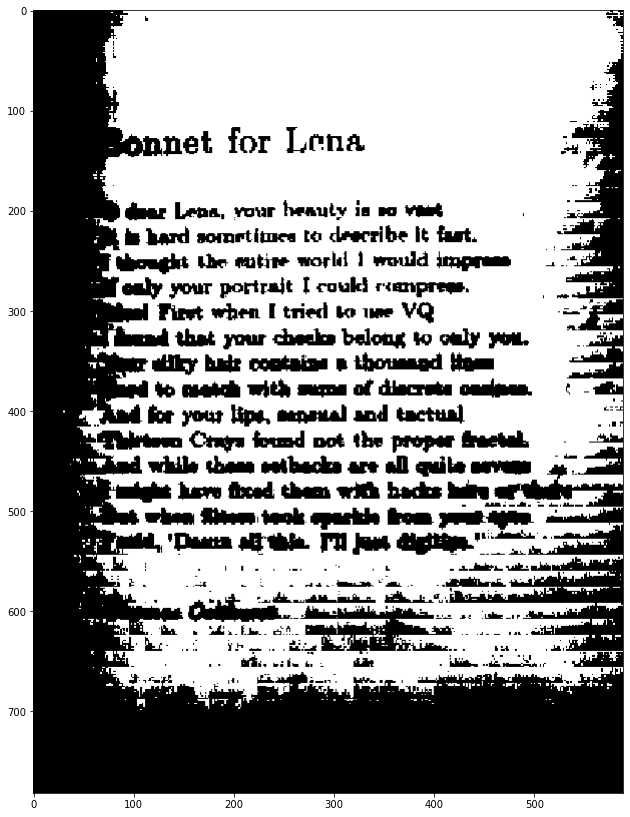

In [87]:
# view the binarized image
show_image(binarized_image)

In [88]:
# try using Tesseract on the binarized image
text = pytesseract.image_to_string(binarized_image)
print(text)

  
   
  
     
 
   

Bonnet for Lena

1D dear Lens, your henuty ia eo viet
AM is hard sormetinecs to deecribe it fast.
AE tought the mutire world | would iegprems

Mf caly your portrajt [ could rianprees.
First when [ tried to we VQ

 

© teeboh with sume of discrete onsines.

: for your Hips, sensual and tactual
Belttew Crays found not the proper fractal.

; while chase sethacks are all quile sevens 4 mad



3) Discuss how to improve recognition algorithms for more robust and accurate character recognition while document images suffer from different types of image degradation. This is an open and optional task. There will be bonus points if you have good ideas on it.

*work with image2 thereafter since it is the one giving problems*

In [216]:
# try filtering image with Gaussian beforehand
gaussian_filtered_image = scipy.ndimage.gaussian_filter(image2, sigma=0.5)

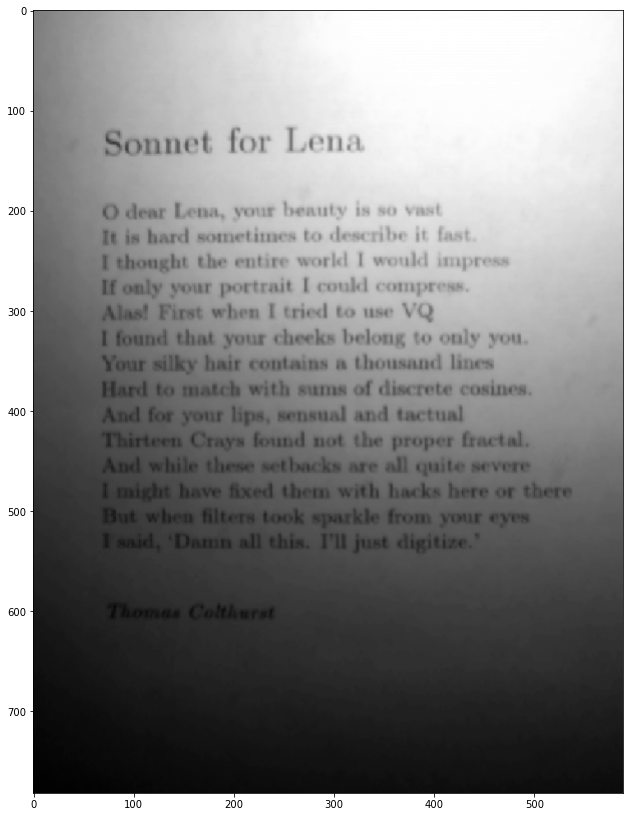

In [217]:
# view the Gaussian-filtered image
show_image(gaussian_filtered_image)

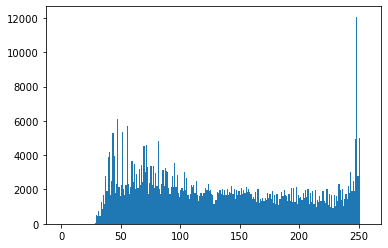

In [218]:
# view the histogram of the Gaussian-filtered image
show_image_histogram(gaussian_filtered_image)

In [275]:
# binarize the image
threshold_mask = otsu.sliding_window_threshold(
    image=gaussian_filtered_image,
    window_height=48,
    window_length=48,
    vertical_stride=12,
    horizontal_stride=12,
)

binarized_image = np.where(gaussian_filtered_image > threshold_mask, 255, 0)
binarized_image = binarized_image.astype(np.uint8)  # right type for Tesseract

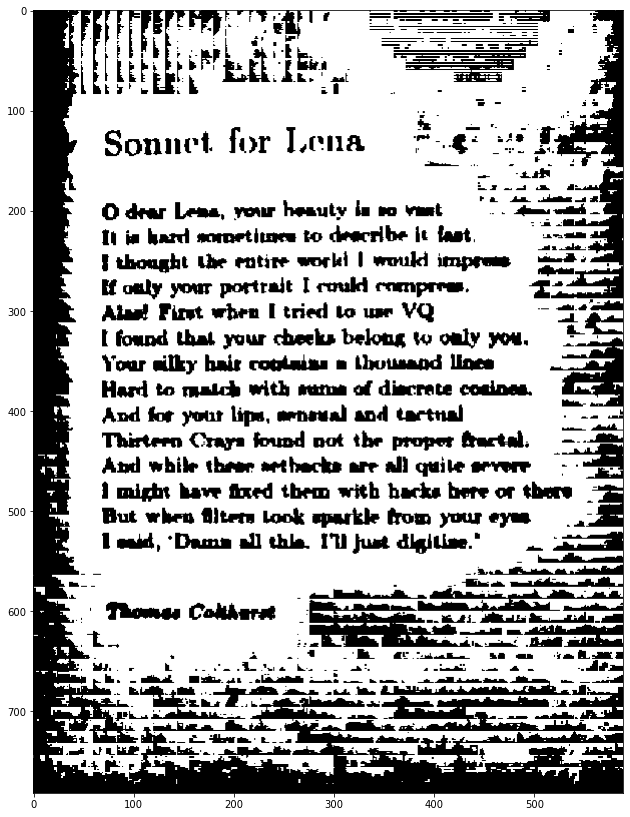

In [276]:
# view the binarized image
show_image(binarized_image)

In [277]:
# try using Tesseract on the binarized image
text = pytesseract.image_to_string(binarized_image)
print(text)

 

   

   

O dear Lea, your heauty ia so vant
1h ia hard sometinnes to deacribe it fast.

P thought Ube entire work! | would impress
Hf only your portrait [ could compreas.
Alas! First when [ tried to usr VQ
[found that your cheeks belong t ouly you. = 4
Your silky hair cogtains = thutusand lines

Hard to match with mame of discrete cosines.

And for your lips, eenewal and tactial “Ie
Thistern Craya found not the proper fractal. =a
Ain while theer sethecks are all quile severe > il
1 might have fixed them with hacks here or there
But when filters Look sparkle from your eyes
Lead, ‘Decn all thie. I'll just digitine." :

 

 
    
 

